<a href="https://colab.research.google.com/github/goga0001/graph/blob/main/repro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Manual Steps**

---




> Set the runtime to GPU via "Runtime > Change runtime type..."







# **Clone Git repository**

In [1]:
!git clone https://github.com/DeepGraphLearning/torchdrug

Cloning into 'torchdrug'...
remote: Enumerating objects: 1231, done.
remote: Counting objects: 100% (601/601), done.
remote: Compressing objects: 100% (265/265), done.
remote: Total 1231 (delta 363), reused 486 (delta 321), pack-reused 630
Receiving objects: 100% (1231/1231), 2.62 MiB | 10.33 MiB/s, done.
Resolving deltas: 100% (629/629), done.


In [2]:
cd torchdrug

/content/torchdrug


# **Install requirements**

In [3]:
!pip install decorator  rdkit rdkit-pypi torch_geometric==2.0.4 matplotlib  tqdm  networkx   jinja2  lmdb  fair-esm 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.1 MB 2.0 MB/s 
     |████████████████████████████████| 29.1 MB 1.3 MB/s 
     |████████████████████████████████| 407 kB 66.7 MB/s 
     |████████████████████████████████| 93 kB 759 kB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.0.4-py3-none-any.whl size=616602 sha256=964685ae7267c3c216b26ed3cd36a1f63f814d469c3c9bea60193df4951201fd
  Stored in directory: /root/.cache/pip/wheels/18/a6/a4/ca18c3051fcead866fe7b85700ee2240d883562a1bc70ce421
Successfully built torch-geometric


In [4]:
!pip install --no-index torch-scatter -f https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
!pip install --no-index torch-sparse -f https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
!pip install --no-index torch-cluster -f https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
!pip install --no-index torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html

Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
     |████████████████████████████████| 8.9 MB 11.4 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
     |████████████████████████████████| 3.5 MB 16.3 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
     |████████████████████████████████| 2.5 MB 7.0 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
     |████████████████████████████████| 722 kB 8.7 MB/s 


In [5]:
pip install fair-esm==0.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: fair-esm
    Found existing installation: fair-esm 2.0.0
    Uninstalling fair-esm-2.0.0:
      Successfully uninstalled fair-esm-2.0.0


In [6]:
!pip install Ninja==1.10.2.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 120 kB 12.9 MB/s 


In [7]:
pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Run setup.py**

In [8]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating torchdrug.egg-info
writing torchdrug.egg-info/PKG-INFO
writing dependency_links to torchdrug.egg-info/dependency_links.txt
writing requirements to torchdrug.egg-info/requires.txt
writing top-level names to torchdrug.egg-info/top_level.txt
writing manifest file 'torchdrug.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'torchdrug.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/torchdrug
copying torchdrug/patch.py -> build/lib/torchdrug
copying torchdrug/__init__.py -> build/lib/torchdrug
creating build/lib/torchdrug/transforms
copying torchdrug/transforms/transform.py -> build/lib/torchdrug/transforms
copying torchdrug/transforms/__init__.py -> build/lib/torchdrug/transforms
creating build/lib/torchdrug/data
copying torchdrug/data/feature.py -> build/lib/torchdrug/data
copying torchdr

# **Prepare the Pretraining Dataset(5 min)**

**add a new dataset with the following:**

In [ ]:
import os

from torchdrug import data, utils
from torchdrug.core import Registry as R


@R.register("datasets.ZINC250k")
@utils.copy_args(data.MoleculeDataset.load_csv, ignore=("smiles_field", "target_fields"))
class ZINC250k(data.MoleculeDataset):
    """
    Subset of Flavonoid compound database for virtual screening.

    Statistics:
        - #Molecule: 4,800
        - #Regression task: 2

    Parameters:
        path (str): path to store the dataset
        verbose (int, optional): output verbose level
        **kwargs
    """

    url = "https://raw.githubusercontent.com/goga0001/graph/main/data.csv"

    target_fields = ["logP", "qed"]

    def __init__(self, path, verbose=1, **kwargs):
        path = os.path.expanduser(path)
        if not os.path.exists(path):
            os.makedirs(path)
        self.path = path

        file_name = utils.download(self.url, path)

        self.load_csv(file_name, smiles_field="smiles", target_fields=self.target_fields,
                      verbose=verbose, **kwargs)

In [9]:
import torch
from torchdrug import datasets

dataset = datasets.ZINC250k("~/molecule-datasets/", kekulize=True,
                            atom_feature="symbol")

INFO:torchdrug.utils.file:Downloading https://raw.githubusercontent.com/goga0001/graph/main/data.csv to /root/molecule-datasets/data.csv


15:27:21   Downloading https://raw.githubusercontent.com/goga0001/graph/main/data.csv to /root/molecule-datasets/data.csv


Loading /root/molecule-datasets/data.csv: 4807it [00:00, 67940.95it/s]            
Constructing molecules from SMILES: 100%|██████████| 4806/4806 [00:09<00:00, 518.79it/s]


# **Define the Model: GraphAF (30sec)**

In [10]:
from torchdrug import core, models, tasks
from torchdrug.layers import distribution

model = models.RGCN(input_dim=dataset.num_atom_type,
                    num_relation=dataset.num_bond_type,
                    hidden_dims=[256, 256, 256], batch_norm=True)

num_atom_type = dataset.num_atom_type
# add one class for non-edge
num_bond_type = dataset.num_bond_type + 1

node_prior = distribution.IndependentGaussian(torch.zeros(num_atom_type),
                                              torch.ones(num_atom_type))
edge_prior = distribution.IndependentGaussian(torch.zeros(num_bond_type),
                                              torch.ones(num_bond_type))
node_flow = models.GraphAF(model, node_prior, num_layer=12)
edge_flow = models.GraphAF(model, edge_prior, use_edge=True, num_layer=12)

task = tasks.AutoregressiveGeneration(node_flow, edge_flow,
                                      max_node=38, max_edge_unroll=12,
                                      criterion="nll")

In [11]:
dataset.num_bond_type

2

In [12]:
model.layers[0].num_relation

2

In [12]:
for data in dataset:
  data['graph'].num_relation = torch.tensor(2)

In [13]:
dataset[3]["graph"].num_relation

tensor(2)

# **Pretraining and Generation: GraphAF**

In [ ]:
from torch import nn, optim
optimizer = optim.Adam(task.parameters(), lr = 1e-3)
solver = core.Engine(task, dataset, None, None, optimizer,
                     gpus=(0,), batch_size=10, log_interval=10)

solver.train(num_epoch=7)
solver.save("graphaf_WB3.pkl")

In [80]:
from collections import defaultdict

solver.load("graphaf_WB3.pkl")
results = task.generate(num_sample=32)
print(results.to_smiles())

17:46:23   Load checkpoint from graphaf_WB3.pkl
['CBr', 'CC1=[SH]2=S1CC(O)=N2', 'C=P(=C)C1OC2(Cl)OC12C', 'CCC(=O)C(N)(O)CCl', 'OC1=C(Br)C=C1', 'NBr', 'CCP', 'OC1[SH]2OCC12O', 'O=C(Cl)Br', 'CN=P', 'NP', 'OC1OC2CN3OC4CP3(=C14)C2', 'CCS', 'C', 'C=[PH](Cl)CCl', 'C', 'C=PC', 'CP', 'N=P1(Cl)ON(NO)P1', 'C', 'NCC(O)S', 'ONC1=[SH]C1', 'CS', 'PC=C1C2=NC1=[SH]C2', 'OCCC1=C(Cl)P=C1', 'CCBr', 'Cl', 'C1NO1', 'OCCCl', 'C', 'CC=CC', 'CN1[SH]=C2C1NN2Cl']


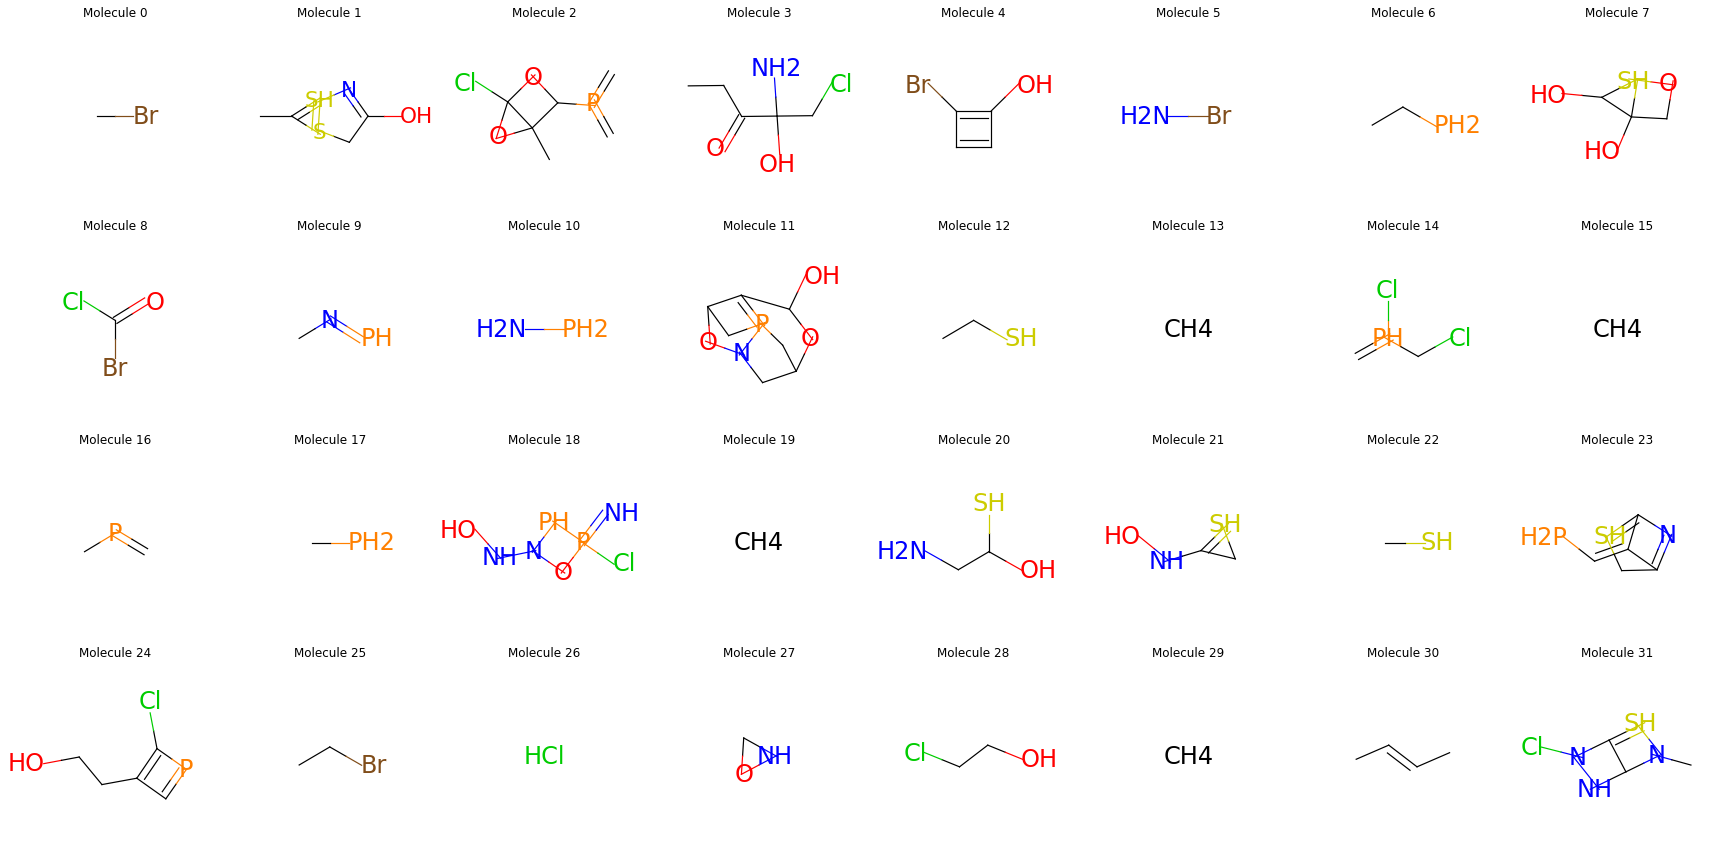

In [81]:
%matplotlib inline
results.visualize(num_row=4, num_col=None, save_file=None, titles=None)